**At first, we should load the image_data from mnist_digit_classification dataset**

(60000, 28, 28) (60000,)


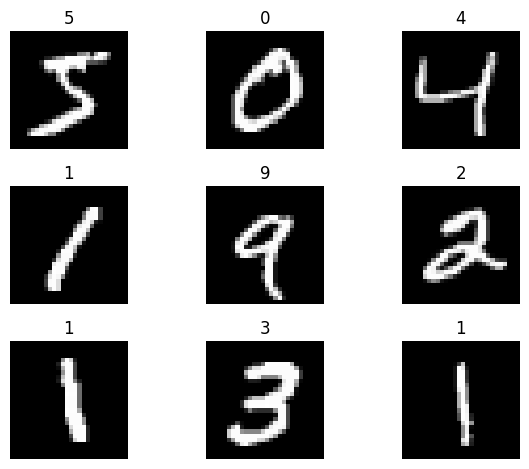

In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

# printing some of the loaded images

def show_images(images, labels):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


show_images(x_train[:10], y_train[:10])

# Now we should reshape the datasets to 4 dimension
x_train_4d = x_train.reshape(x_train.shape[0], 28, 28, 1)


**Now we need to augment the images to generate more images**

(60000, 28, 28, 1) (60000,)


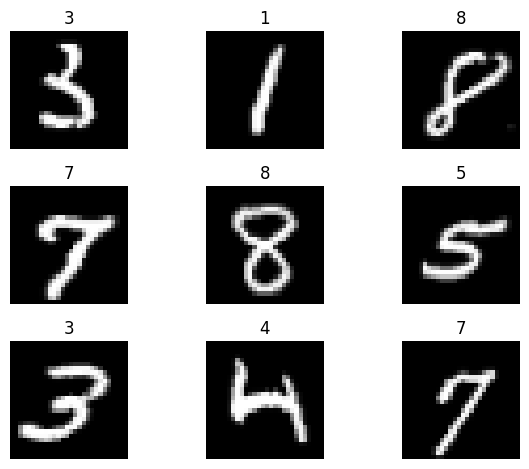

In [44]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = 0.05,
    shear_range = 0.15
)

batch_size = 32

augmented_images = image_generator.flow(
    x_train_4d,
    y_train,
    batch_size,
)

new_train_images = []
new_train_labels = []

for _ in range(len(x_train)//batch_size):
    batch_images, batch_labels = next(augmented_images)
    new_train_images.append(batch_images)
    new_train_labels.append(batch_labels)

# Now need to concatenate the batches to generate a single numpy array
new_train_images = np.concatenate(new_train_images, axis=0)
new_train_labels = np.concatenate(new_train_labels, axis=0)

print(new_train_images.shape, new_train_labels.shape)

show_images(new_train_images[:10], new_train_labels[:10])

**The next step is to create a model**

In [50]:
from keras.layers import Input,Flatten, Conv2D, MaxPooling2D, Dense

def create_model():
    inputs = Input((28,28,1), name='InputLayer')
    x = Conv2D(32, (3,3), (1,1), activation='relu') (inputs)
    x = Conv2D(64, (3,3), (1,1), activation='relu') (x)
    x = MaxPooling2D((3,3), strides=(1,1)) (x)
    x = Flatten() (x)
    x = Dense(64, activation='relu') (x)
    outputs = Dense(10, activation='softmax', name='OutputLayer') (x)

    model = tf.keras.Model(inputs, outputs, name='Multi_Class_Classifier')

    model.compile(loss='categorical_crossentropy', metrics='accuracy')

    model.summary()

    return model

**Now creating a model and then fitting it with the original mnist data**

In [52]:
original_data_model = create_model()

y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)

print(x_train_4d.shape, y_train_categorical.shape)

original_data_model.fit(x_train_4d, y_train_categorical, batch_size=32, validation_split = 0.1, epochs= 10)


Model: "Multi_Class_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 22, 22, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 30976)             0         
                                                                 
 dense_11 (Dense)            (None, 64)                1982528   
                                            